# Import Libraries

In [2]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import os
os.chdir(f'C:\\Users\\Khangjrakpam Arjun\\OneDrive - McKinsey & Company\\Documents\\ARJUN\\ML\\COMPETITIONS\\Amex\\amex-default-prediction\\data')

Aggregated data are shared in dataset: https://www.kaggle.com/datasets/huseyincot/amex-agg-data-pickle
Data created with following code: https://www.kaggle.com/code/huseyincot/amex-agg-data-how-it-created

In [10]:
train = pd.read_pickle("train_agg.pkl", compression="gzip")
test = pd.read_pickle("test_agg.pkl", compression="gzip")

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 458913 entries, 0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a to fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681
Columns: 919 entries, P_2_mean to target
dtypes: float32(372), float64(261), int16(27), int64(23), int8(236)
memory usage: 1.7+ GB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 924621 entries, 00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7 to fffffa7cf7e453e1acc6a1426475d5cb9400859f82ff61cceb803ea8ec37634d
Columns: 918 entries, P_2_mean to D_68_nunique
dtypes: float32(372), float64(261), int16(30), int64(22), int8(233)
memory usage: 3.5+ GB


In [13]:
train.head()

,P_2_mean,P_2_std,P_2_min,P_2_max,P_2_last,D_39_mean,D_39_std,D_39_min,D_39_max,D_39_last,...,D_64_count,D_64_last,D_64_nunique,D_66_count,D_66_last,D_66_nunique,D_68_count,D_68_last,D_68_nunique,target
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.933824,0.024194,0.868580,0.960384,0.934745,0.230769,0.832050,0,3,0,...,13,0,1,13,-1,1,13,6,1,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.899820,0.022119,0.861109,0.929122,0.880519,7.153846,6.743468,0,19,6,...,13,0,1,13,-1,1,13,6,1,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.878454,0.028911,0.797670,0.904482,0.880875,0.000000,0.000000,0,0,0,...,13,2,1,13,-1,1,13,6,1,0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.598969,0.020107,0.567442,0.623392,0.621776,1.538462,3.017046,0,9,0,...,13,0,1,13,-1,1,13,3,3,0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.891679,0.042325,0.805045,0.940382,0.871900,0.000000,0.000000,0,0,0,...,13,0,1,13,1,1,13,6,1,0


# Competition Metric

In [14]:
def amex_metric(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
    def top_four_percent_captured(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x == 0 else 1)
        four_pct_cutoff = int(0.04 * df['weight'].sum())
        df['weight_cumsum'] = df['weight'].cumsum()
        df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()

    def weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x == 0 else 1)
        df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
        total_pos = (df['target'] * df['weight']).sum()
        df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
        df['lorentz'] = df['cum_pos_found'] / total_pos
        df['gini'] = (df['lorentz'] - df['random']) * df['weight']
        return df['gini'].sum()

    def normalized_weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        y_true_pred = y_true.rename(columns={'target': 'prediction'})
        return weighted_gini(y_true, y_pred) / weighted_gini(y_true, y_true_pred)

    g = normalized_weighted_gini(y_true, y_pred)
    d = top_four_percent_captured(y_true, y_pred)

    return 0.5 * (g + d)

In [15]:
features = test.columns.to_list()
cat_features = [
    "B_30",
    "B_38",
    "D_114",
    "D_116",
    "D_117",
    "D_120",
    "D_126",
    "D_63",
    "D_64",
    "D_66",
    "D_68"
]
cat_features = [f"{cf}_last" for cf in cat_features]
le_encoder = LabelEncoder()
for categorical_feature in cat_features:
    train[categorical_feature] = le_encoder.fit_transform(train[categorical_feature])
    test[categorical_feature] = le_encoder.transform(test[categorical_feature])

In [16]:
train_y = pd.DataFrame(train["target"])
train_x = train.drop("target", axis=1)

# Model Training

In [17]:
N_FOLDS = 5
skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=22)
y_oof = np.zeros(train_x.shape[0])
y_test = np.zeros(test.shape[0])
ix = 0
for train_ind, val_ind in skf.split(train_x, train_y):
    print(f"******* Fold {ix} ******* ")
    tr_x, val_x = (
        train_x.iloc[train_ind].reset_index(drop=True),
        train_x.iloc[val_ind].reset_index(drop=True),
    )
    tr_y, val_y = (
        train_y.iloc[train_ind].reset_index(drop=True),
        train_y.iloc[val_ind].reset_index(drop=True),
    )

    clf = CatBoostClassifier(iterations=5000, random_state=22)
    clf.fit(tr_x, tr_y, eval_set=[(val_x, val_y)], cat_features=cat_features,  verbose=100)
    preds = clf.predict_proba(val_x)[:, 1]
    y_oof[val_ind] = y_oof[val_ind] + preds

    preds_test = clf.predict_proba(test)[:, 1]
    y_test = y_test + preds_test / N_FOLDS
    ix = ix + 1
y_pred = train_y.copy(deep=True)
y_pred = y_pred.rename(columns={"target": "prediction"})
y_pred["prediction"] = y_oof
val_score = amex_metric(train_y, y_pred)
print(f"Amex metric: {val_score}")

******* Fold 0 ******* 
Learning rate set to 0.067666
0:	learn: 0.6120772	test: 0.6122906	best: 0.6122906 (0)	total: 1.37s	remaining: 1h 54m 26s
100:	learn: 0.2272345	test: 0.2309752	best: 0.2309752 (100)	total: 1m 42s	remaining: 1h 22m 35s
200:	learn: 0.2201190	test: 0.2254878	best: 0.2254878 (200)	total: 3m 12s	remaining: 1h 16m 46s
300:	learn: 0.2155245	test: 0.2232483	best: 0.2232483 (300)	total: 4m 46s	remaining: 1h 14m 34s
400:	learn: 0.2119154	test: 0.2220908	best: 0.2220908 (400)	total: 6m 25s	remaining: 1h 13m 41s
500:	learn: 0.2088974	test: 0.2214069	best: 0.2214069 (500)	total: 8m 2s	remaining: 1h 12m 14s
600:	learn: 0.2061230	test: 0.2208882	best: 0.2208882 (600)	total: 9m 42s	remaining: 1h 11m 6s
700:	learn: 0.2035487	test: 0.2204978	best: 0.2204978 (700)	total: 11m 22s	remaining: 1h 9m 47s
800:	learn: 0.2011118	test: 0.2201872	best: 0.2201836 (798)	total: 12m 57s	remaining: 1h 7m 56s
900:	learn: 0.1988276	test: 0.2200110	best: 0.2200064 (894)	total: 14m 35s	remaining: 1h 

3400:	learn: 0.1544842	test: 0.2158601	best: 0.2155484 (2451)	total: 42m 46s	remaining: 20m 6s
3500:	learn: 0.1529596	test: 0.2158635	best: 0.2155484 (2451)	total: 44m 3s	remaining: 18m 51s
3600:	learn: 0.1514366	test: 0.2159056	best: 0.2155484 (2451)	total: 45m 20s	remaining: 17m 36s
3700:	learn: 0.1500877	test: 0.2159326	best: 0.2155484 (2451)	total: 46m 32s	remaining: 16m 20s
3800:	learn: 0.1487623	test: 0.2159728	best: 0.2155484 (2451)	total: 47m 46s	remaining: 15m 4s
3900:	learn: 0.1473434	test: 0.2160005	best: 0.2155484 (2451)	total: 49m 1s	remaining: 13m 48s
4000:	learn: 0.1459363	test: 0.2160584	best: 0.2155484 (2451)	total: 50m 16s	remaining: 12m 33s
4100:	learn: 0.1445699	test: 0.2160528	best: 0.2155484 (2451)	total: 51m 31s	remaining: 11m 17s
4200:	learn: 0.1432171	test: 0.2161062	best: 0.2155484 (2451)	total: 52m 44s	remaining: 10m 1s
4300:	learn: 0.1419786	test: 0.2161601	best: 0.2155484 (2451)	total: 53m 58s	remaining: 8m 46s
4400:	learn: 0.1406690	test: 0.2162402	best: 0

1600:	learn: 0.1844194	test: 0.2180106	best: 0.2179740 (1554)	total: 21m 12s	remaining: 45m 2s
1700:	learn: 0.1824835	test: 0.2179330	best: 0.2179259 (1695)	total: 22m 36s	remaining: 43m 49s
1800:	learn: 0.1805999	test: 0.2178912	best: 0.2178806 (1795)	total: 23m 54s	remaining: 42m 27s
1900:	learn: 0.1787784	test: 0.2178686	best: 0.2178686 (1900)	total: 25m 12s	remaining: 41m 5s
2000:	learn: 0.1769772	test: 0.2179028	best: 0.2178339 (1946)	total: 26m 33s	remaining: 39m 47s
2100:	learn: 0.1751493	test: 0.2178373	best: 0.2178319 (2097)	total: 27m 51s	remaining: 38m 26s
2200:	learn: 0.1734003	test: 0.2178026	best: 0.2177968 (2193)	total: 29m 10s	remaining: 37m 5s
2300:	learn: 0.1716887	test: 0.2177463	best: 0.2177358 (2270)	total: 30m 28s	remaining: 35m 44s
2400:	learn: 0.1699207	test: 0.2177598	best: 0.2177162 (2345)	total: 31m 46s	remaining: 34m 23s
2500:	learn: 0.1681473	test: 0.2177875	best: 0.2177162 (2345)	total: 33m 3s	remaining: 33m 2s
2600:	learn: 0.1664835	test: 0.2177846	best: 

4999:	learn: 0.1329793	test: 0.2176098	best: 0.2162291 (2349)	total: 1h 5m 1s	remaining: 0us

bestTest = 0.2162290696
bestIteration = 2349

Shrink model to first 2350 iterations.
Amex metric: 0.7916274632281144


In [18]:
y_oof_binary = (y_oof >= np.percentile(y_oof, 96)).astype(int)

In [19]:
y_oof_binary.mean()

0.040001045949885926

# Plot Confusion Matrix

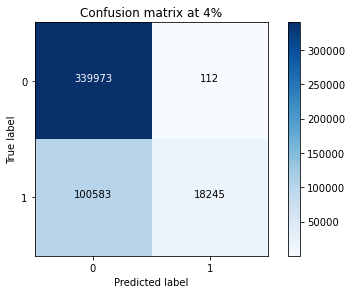

In [20]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm = confusion_matrix(train_y, y_oof_binary)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm,
                      classes = class_names,
                      title = f'Confusion matrix at 4%')
plt.show()

# Submission

In [1]:
test["prediction"] = y_test
test["prediction"].to_csv(f"submission_cat_{val_score}.csv", index=True)

NameError: name 'y_test' is not defined

In [22]:
os.getcwd()

'C:\\Users\\Khangjrakpam Arjun\\OneDrive - McKinsey & Company\\Documents\\ARJUN\\ML\\COMPETITIONS\\Amex\\amex-default-prediction\\data'

### Save model to disk

In [33]:
# save the model to disk
from datetime import datetime
current_time = datetime.now().strftime("%H_%M_%S")
filename = r'C:\Users\Khangjrakpam Arjun\OneDrive - McKinsey & Company\Documents\ARJUN\ML\COMPETITIONS\Amex\amex-default-prediction\saved_model\catboost'+'\\'+('catboost') +'_model.sav'
print(filename)
import pickle
pickle.dump(clf, open(filename, 'wb'))


C:\Users\Khangjrakpam Arjun\OneDrive - McKinsey & Company\Documents\ARJUN\ML\COMPETITIONS\Amex\amex-default-prediction\saved_model\catboost\catboost_model.sav


### Load model from disk

In [34]:
# load the model from disk
clf = pickle.load(open(filename, 'rb'))
#rfr.score(X_test, y_test)